# 4.10: Coding Etiquette & Excel Reporting

## 01. Importing libs and data
## 02. Identifying and addressing PII data ( Data security )
## 03. Region level spending flag
## 04. Exclusion flag for low-activity customers
## 05. Creating profiles based on age, income, number of dependents for marketing to target campaigns effectively
## 06. Creating appropriate visualizations
## 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
## 08. Compare your customer profiles with regions and departments. Can you identify a link between them?
## 09. Saving visualizations
## 10. Exporting final dataframe

# 01. Importing libs and data


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining path
path = r'C:\Users\hiron\Documents\050924_Instakart Basket analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
# Creating crosstab

In [5]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,number_of_orders,weekday,order_hour_of_day,...,frequency_flag,First Name,last name,Gender,state,Age,joining date,number of dependents,family status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [6]:
ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'number_of_orders', 'weekday',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'max_order', 'loyalty_flag', 'frequency_flag', 'First Name',
       'last name', 'Gender', 'state', 'Age', 'joining date',
       'number of dependents', 'family status', 'income'],
      dtype='object')

In [7]:
crosstab = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['number_of_orders'], dropna = False)

In [8]:
crosstab.to_clipboard()

# 02. Identifying and addressing PII data ( Data security )

In [9]:
# We have the first name and last name data which we will need to delete

In [10]:
# First renaming our df for ease of operations

In [11]:
dff = ords_prods_merge

In [12]:
dff = dff.drop(['First Name', 'last name'], axis=1)

In [13]:
dff.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,number_of_orders,weekday,order_hour_of_day,...,max_order,loyalty_flag,frequency_flag,Gender,state,Age,joining date,number of dependents,family status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,32,Regular customer,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,32,Regular customer,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,5,New customer,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,3,New customer,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,3,New customer,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308


# 03. Region level spending flag

In [14]:
# we will 
# 1. Create an empty list to store the values
# 2. Write the code to map states to regions
# 3. Transfer this list to a new column called region in the main dataframe


In [15]:
# 1.
region_map = []

In [16]:
#2.
for state in dff["state"]:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 
                 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
                 'New Jersey']:
        region_map.append("Northeast")
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
                   'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
                   'Minnesota', 'Iowa', 'Missouri']:
        region_map.append("Midwest")
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 
                   'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 
                   'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region_map.append("South")
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 
                   'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 
                   'California', 'Hawaii']:
        region_map.append("West")
    else:
        region_map.append("Unknown")

In [17]:
# 3.
dff['region'] = region_map

In [18]:
dff.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,number_of_orders,weekday,order_hour_of_day,...,loyalty_flag,frequency_flag,Gender,state,Age,joining date,number of dependents,family status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Regular customer,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Regular customer,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,New customer,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,New customer,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,New customer,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest


In [19]:
dff.shape

(32404859, 23)

## 03. Part 2 , since I deleted spending flag from this df before, I am going to recreate it

In [20]:
dff['mean_price'] = dff.groupby(['user_id'])['prices'].transform('mean')

In [21]:
# assigning flags

In [22]:
dff.loc[dff['mean_price']>=10 , 'spending_flag'] = 'High-spender'

In [23]:
dff.loc[dff['mean_price']<10 , 'spending_flag'] = 'Low-spender'

In [24]:
dff[['user_id', 'spending_flag', 'mean_price']].head(20)

,user_id,spending_flag,mean_price
0,138,Low-spender,6.935811
1,138,Low-spender,6.935811
2,709,Low-spender,7.930208
3,764,Low-spender,4.972414
4,764,Low-spender,4.972414
5,777,Low-spender,6.935398
6,825,Low-spender,5.957576
7,910,Low-spender,6.680000
8,1052,Low-spender,7.162500
9,1052,Low-spender,7.162500


In [25]:
# Remove duplicate user IDs to get unique users
dff_unique_customers = dff.drop_duplicates(subset='user_id')

In [26]:
# Create the crosstab with unique users for spending habits by region
spending_crosstab_unique = pd.crosstab(dff_unique_customers['region'], dff_unique_customers['spending_flag'])

In [27]:
# Display the results
print(spending_crosstab_unique)

spending_flag  High-spender  Low-spender
region                                  
Midwest                1263        47256
Northeast               883        35505
South                  1817        66920
West                   1394        51171


### From a marketing perspective, since , we should ideally categorize the spending habots in more buckets since the % high spendors is quite low to relay meaningful information

### From the data above, the highest number of high spednors are in the South region while the lowest ones. In terms of the prportion of high to low spendors, there is not much difference between the regions

# 04. Exclusion flag for low-activity customers

In [28]:
# Create a max_order column with the maximum number_of_orders for each user_id
dff['max_order'] = dff.groupby('user_id')['number_of_orders'].transform('max')

In [29]:
# Create an exclusion flag based on the max_order column
dff['exclusion_flag'] = dff['max_order'] < 5

In [30]:
# Value counts for excluded and non-excluded customers
exclusion_counts = dff['exclusion_flag'].value_counts()

In [31]:
exclusion_counts

exclusion_flag
False    30964564
True      1440295
Name: count, dtype: int64

In [32]:
# Filter out low-activity customers (non-excluded)
dff_active_customers = dff[dff['exclusion_flag'] == False]

In [33]:
# Export as a pickle file
dff_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers410.pkl'))

# 05. Creating profiles based on age, income, number of dependents for marketing to target campaigns effectively

In [34]:
# Function to assign customer profile based on demographics and purchasing behavior
def profile_customer(row):
    # Profile based on age, income, number of dependents, department, order time, and order day
    if row['Age'] < 30 and row['income'] < 50000 and row['number of dependents'] <= 1:
        if row['department_id'] in [19, 21, 24]:  # snacks, alcohol, frozen foods
            return 'Young Adult'
    elif 25 <= row['Age'] < 40 and row['income'] >= 50000 and row['number of dependents'] <= 2:
        if row['department_id'] in [6, 16, 17, 7]:  # baby products, dairy, snacks, breakfast foods
            return 'Young Parent'
    elif 30 <= row['Age'] <= 50 and row['income'] >= 50000 and row['number of dependents'] > 1:
        if row['department_id'] in [5, 16, 4, 12]:  # household, dairy, produce, meat/seafood
            return 'Established Family'
    elif row['Age'] > 50 and row['income'] >= 60000 and row['number of dependents'] == 0:
        if row['department_id'] in [4, 16, 10, 8]:  # produce, dairy, health & wellness, beverages
            return 'Older Adult'
    return 'Other'  # For customers not fitting any specific profile

In [35]:
# Apply profile_customer function to each row of dff to create a new 'profile' column
dff['profile'] = dff.apply(profile_customer, axis=1)

# 06. Creating appropriate visualizations

In [36]:
# Calculate profile distribution
profile_counts =dff['profile'].value_counts()

In [37]:
profile_counts

profile
Other                 27549887
Established Family     1792131
Older Adult            1652471
Young Parent           1335516
Young Adult              74854
Name: count, dtype: int64

In [38]:
# even though we have many counts in Other, we will proceed as this can help focus our marketing efforts
# based on the results from first marketing campaigns, we can tweak the profile criteria to expand them if needed

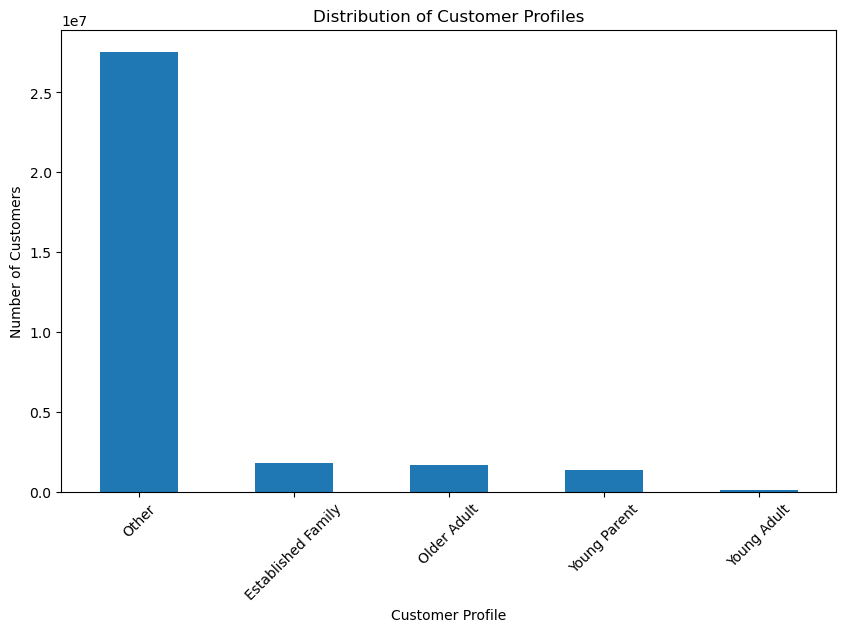

In [55]:
# Plot the distribution of profiles as a bar chart
fig_profiledist= plt.figure(figsize=(10, 6))
profile_counts.plot(kind='bar')

# Add titles and labels
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Display the plot
plt.show()

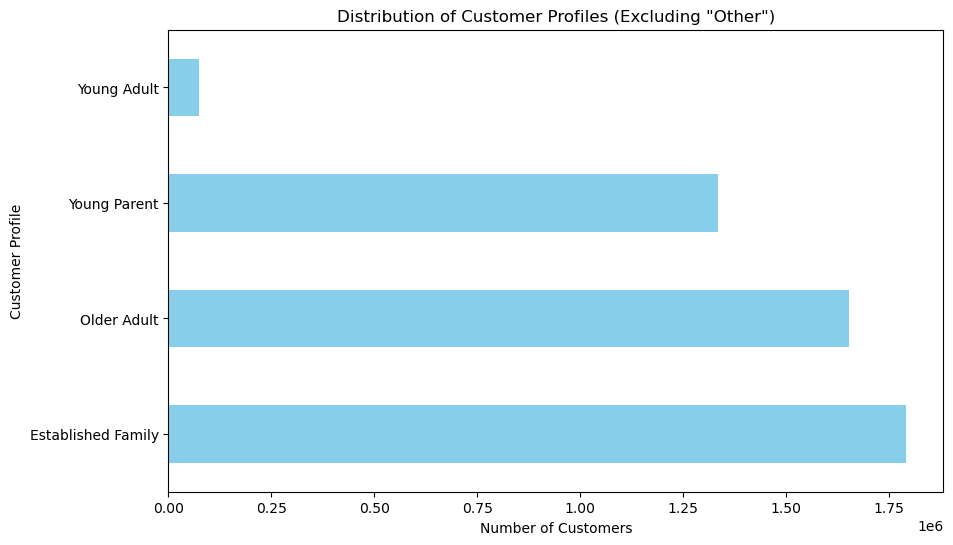

In [54]:
# Filter out the "Other" category
profile_counts_filtered = dff['profile'].value_counts().drop('Other', errors='ignore')

# Plot the distribution of profiles as a horizontal bar chart
fig_profiledist_hor = plt.figure(figsize=(10, 6))
profile_counts_filtered.plot(kind='barh', color='skyblue')

# Add titles and labels
plt.title('Distribution of Customer Profiles (Excluding "Other")')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Profile')

# Display the plot
plt.show()

# 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [41]:
# Group by 'profile' and aggregate max, mean, and min for number_of_orders and prices
profile_aggregates = dff.groupby('profile').agg({
    'number_of_orders': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']
}).reset_index()

In [42]:
# Display the aggregated DataFrame
profile_aggregates.columns = ['Profile', 'Max Usage Frequency', 'Mean Usage Frequency', 'Min Usage Frequency',
                              'Max Expenditure', 'Mean Expenditure', 'Min Expenditure']
print(profile_aggregates)

              Profile  Max Usage Frequency  Mean Usage Frequency  \
0  Established Family                   99             17.725023   
1         Older Adult                   99             18.145845   
2               Other                   99             17.027431   
3         Young Adult                   99             16.026812   
4        Young Parent                   99             17.550847   

   Min Usage Frequency  Max Expenditure  Mean Expenditure  Min Expenditure  
0                    1          99999.0         17.375453              1.0  
1                    1          99999.0         17.275583              1.0  
2                    1          99999.0         10.699237              1.0  
3                    1             14.9          4.252405              1.1  
4                    1          99999.0         25.046468              1.0  


In [43]:
dff.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'number_of_orders', 'weekday',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'max_order', 'loyalty_flag', 'frequency_flag', 'Gender', 'state', 'Age',
       'joining date', 'number of dependents', 'family status', 'income',
       'region', 'mean_price', 'spending_flag', 'exclusion_flag', 'profile'],
      dtype='object')

# 08. Compare your customer profiles with regions and departments. Can you identify a link between them?

In [44]:
# Aggregating the count of customers, average prices, and usage frequency by profile, region, and department
profile_region_department = dff.groupby(['profile', 'region', 'department_id']).agg({
    'user_id': 'nunique',         # Count unique users to get customer counts
    'prices': 'mean',             # Average spending (prices)
    'number_of_orders': 'mean'    # Average usage frequency
}).reset_index()

In [45]:
# Rename columns for clarity
profile_region_department.columns = ['Profile', 'Region', 'Department', 'Customer_Count', 'Avg_Spending', 'Avg_Usage_Frequency']

# Display the aggregated data
profile_region_department_sorted = profile_region_department.sort_values(by=['Profile', 'Region', 'Customer_Count'], ascending=[True, True, False])
print(profile_region_department_sorted)

                Profile     Region  Department  Customer_Count  Avg_Spending  \
0    Established Family    Midwest           4            4815      8.064295   
3    Established Family    Midwest          16            4756     43.862956   
2    Established Family    Midwest          12            2999     16.370965   
1    Established Family    Midwest           5             386      8.352144   
4    Established Family  Northeast           4            3571      8.062404   
..                  ...        ...         ...             ...           ...   
132        Young Parent      South           6            3876      7.840886   
138        Young Parent       West          16            6807     27.606105   
137        Young Parent       West           7            6050      7.885775   
139        Young Parent       West          17            3979      7.511845   
136        Young Parent       West           6            2936      7.826793   

     Avg_Usage_Frequency  
0           

## 8a. Visulalizations

In [46]:
# A) Customer Count Heatmap by Profile and Region
# This heatmap will show which profiles are most prevalent in each region.

In [48]:
# Filter out the "Other" profile
filtered_data = profile_region_department[profile_region_department['Profile'] != 'Other']

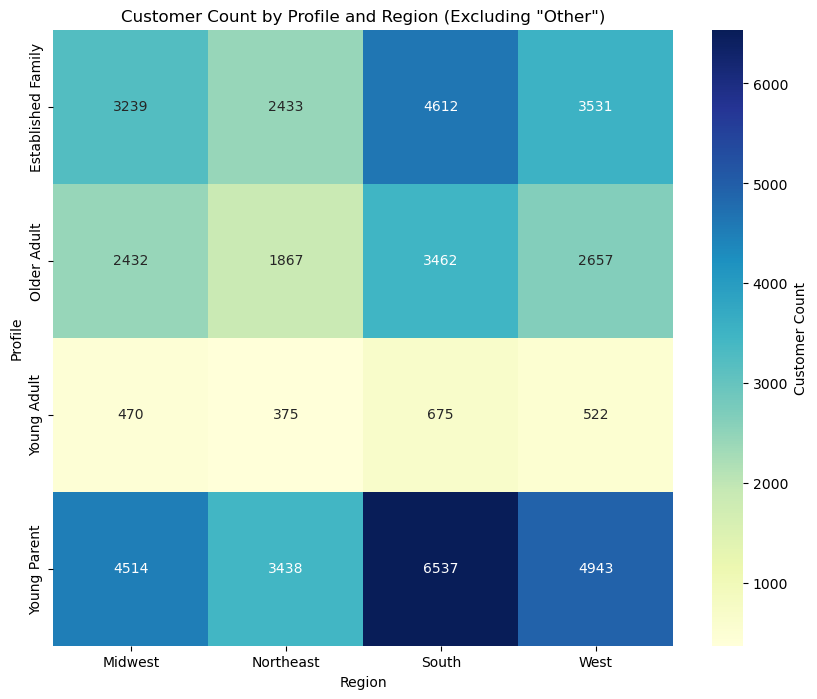

In [53]:
# Pivot data for heatmap visualization
heatmap_data = filtered_data.pivot_table(
    index='Profile', columns='Region', values='Customer_Count', fill_value=0
)

# Plot heatmap
fig_heatmap= plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Customer Count'})
plt.title('Customer Count by Profile and Region (Excluding "Other")')
plt.xlabel('Region')
plt.ylabel('Profile')
plt.show()

In [51]:
# Real life observation : Many ties in programmatic advertising, we may end up with small audience sizes for targeted campaigns 
# Making us consider look-alike audiences to derive real value from setting and running campaigns on nice audiences

# 09. Saving visualizations

In [52]:
# Directory to save images
save_dir = os.path.join(path, '04 Analysis', 'Visualizations')

In [56]:
# Save the heatmap figure
fig_heatmap.savefig(os.path.join(save_dir, 'customer_count_by_profile_and_region.png'), format='png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
# Save the horizontal figure
fig_profiledist_hor.savefig(os.path.join(save_dir, 'profile_distribution_horizontal.png'), format='png', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
# Save the complete profile distribution
fig_profiledist.savefig(os.path.join(save_dir, 'profile_distribution_complete.png'), format='png', dpi=300, bbox_inches='tight')
plt.show()

# 10. Exporting final dataframe

In [60]:
#exporting as a pickle
dff.to_pickle(os.path.join(path, '02 Data','Prepared Data', '410final_merge.pkl'))

In [61]:
dff.shape

(32404859, 27)